In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 92.6 MB/s eta 0:00:00

In [ ]:
!pip install shap

In [ ]:
!pip install artemis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install pyartemis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
import shap
shap.initjs()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, confusion_matrix, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale

In [ ]:
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
import numpy as np

# Preprocessed dataset

In [ ]:
data = pd.read_csv('/content/cardio_data(IQR-pre_binning).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62502 entries, 0 to 62501
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   62502 non-null  int64  
 1   age          62502 non-null  int64  
 2   gender       62502 non-null  int64  
 3   cholesterol  62502 non-null  int64  
 4   gluc         62502 non-null  int64  
 5   smoke        62502 non-null  int64  
 6   alco         62502 non-null  int64  
 7   active       62502 non-null  int64  
 8   cardio       62502 non-null  int64  
 9   BMI          62502 non-null  float64
 10  MAP          62502 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 5.2 MB


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

# SMOTE

In [ ]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [ ]:
y.value_counts()

,count
cardio,
0,31632
1,30870


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
y_res.value_counts()

,count
cardio,
0,31632
1,31632


# Modeling the MLP classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1, random_state=42)

In [ ]:
clf = MLPClassifier(random_state=42)

In [ ]:
cv_results = cross_validate(clf, X_train, y_train, cv=10, return_estimator=True)

In [ ]:
cv_results['test_score']

array([0.70987004, 0.72321742, 0.71794872, 0.71057253, 0.714085  ,
       0.71935371, 0.68703899, 0.70981908, 0.68874056, 0.62638328])

In [ ]:
mask = list((cv_results['test_score'] == cv_results['test_score'].max()).astype(int)).index(1)

In [ ]:
mask

1

In [ ]:
best_estimator = cv_results['estimator'][mask]

In [ ]:
predictions = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, predictions)

In [ ]:
cross_tab = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
cross_tab

Predicted,0,1
Actual,,
0,2252,899
1,856,2320


In [ ]:
TN, FN, FP, TP = cm.ravel()

In [ ]:
print('True Negatives:', TN)
print('False Negatives:', FN)
print('False Positives:', FP)
print('True Positives:', TP)

True Negatives: 2252
False Negatives: 899
False Positives: 856
True Positives: 2320


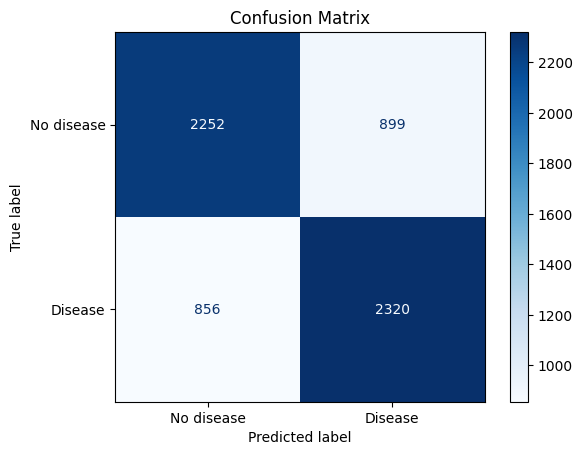

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No disease', 'Disease'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculating evaluation metrics

In [ ]:
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = sensitivity
f1_score = 2 * (precision * recall) / (precision + recall)
TPR = sensitivity
FPR = FP / (FP + TN)
kappa = (2 * (TP * TN - FP * FN)) / ((TP + FP) * (FP + TN) + (TP + FN) * (TN + FN))
MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

In [ ]:
pr, rec, _ = precision_recall_curve(y_test, predictions)
fpr, tpr, _ = roc_curve(y_test, predictions)

In [ ]:
roc_auc = auc(fpr, tpr)
pr_auc = auc(rec, pr)

# Displaying the results of the evaluation metrics

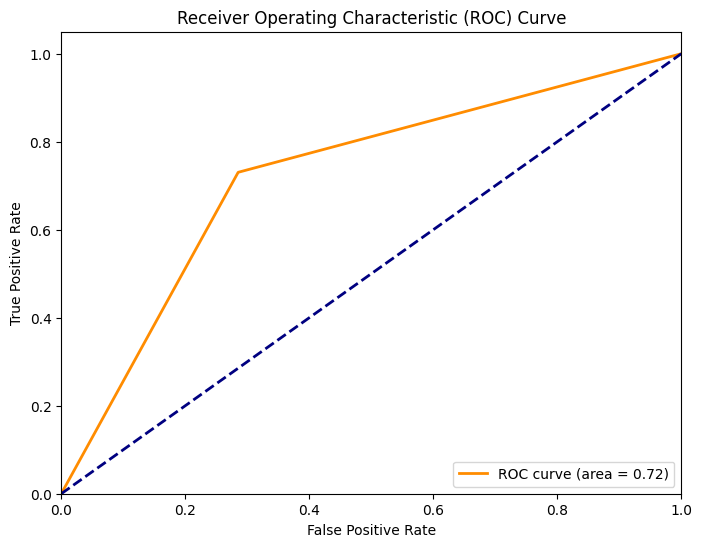

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

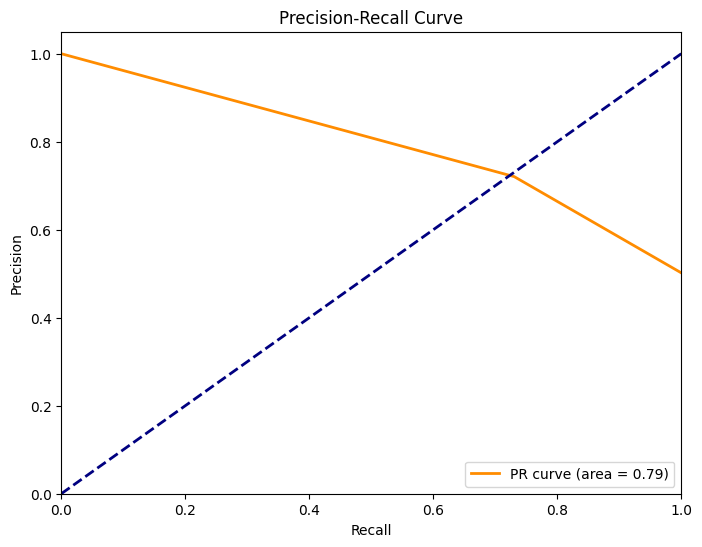

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(rec, pr, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
metrics = {
    'Metric': ['Specificity', 'Sensitivity', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'TPR', 'FPR', 'Kappa', 'MCC', 'ROC AUC', 'PR AUC'],
    'Value': [specificity, sensitivity, accuracy, precision, recall, f1_score, TPR, FPR, kappa, MCC, roc_auc, pr_auc]
}

metrics_df = pd.DataFrame(metrics)
metrics_df['Value'] = metrics_df['Value'].astype(float).round(4)
metrics_df

,Metric,Value
0,Specificity,0.7246
1,Sensitivity,0.7207
2,Accuracy,0.7226
3,Precision,0.7305
4,Recall,0.7207
5,F1-score,0.7256
6,TPR,0.7207
7,FPR,0.2754
8,Kappa,0.4452
9,MCC,0.4452


# Model Explanation & Interpretation

In [ ]:
ale = ALE(best_estimator.predict , feature_names=X_test.columns, target_names=['cardio'])
exp = ale.explain(X_test.to_numpy(), min_bin_points=50)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/v

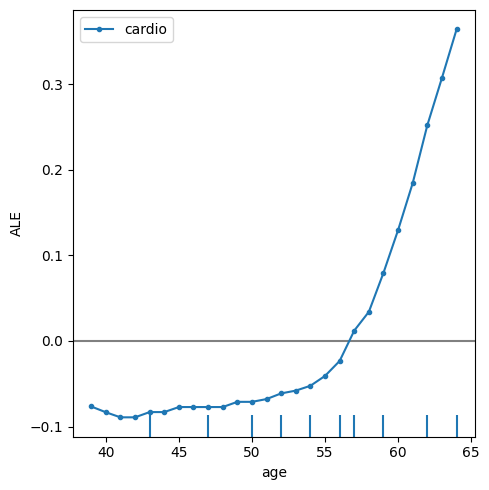

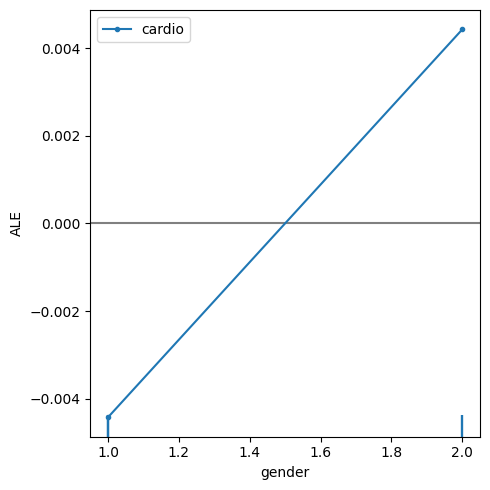

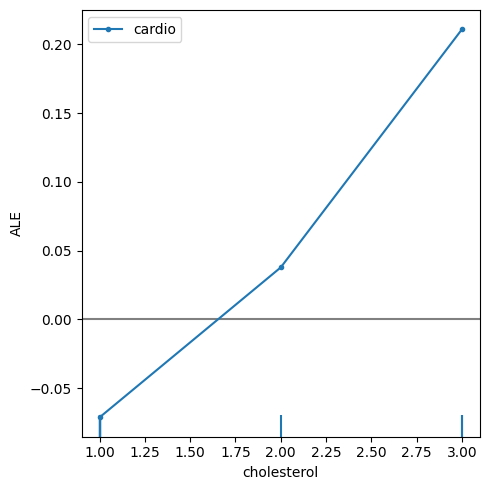

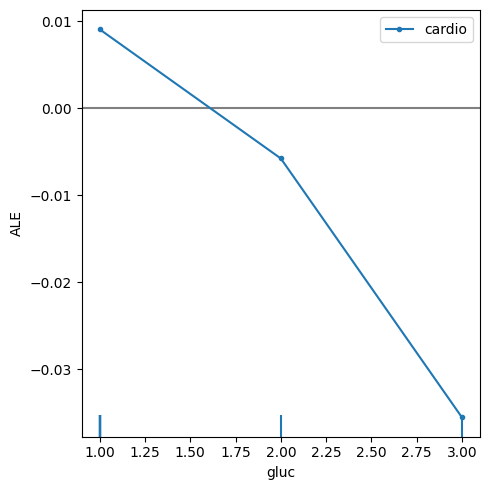

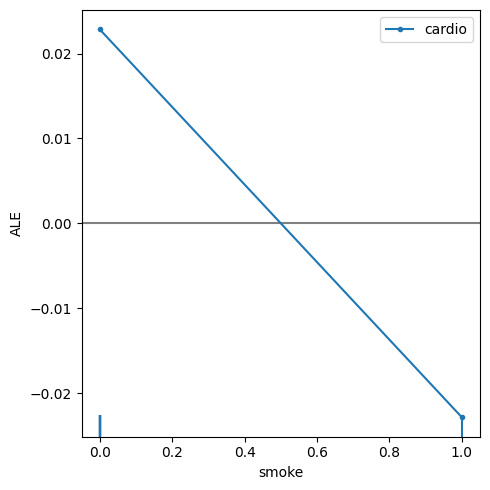

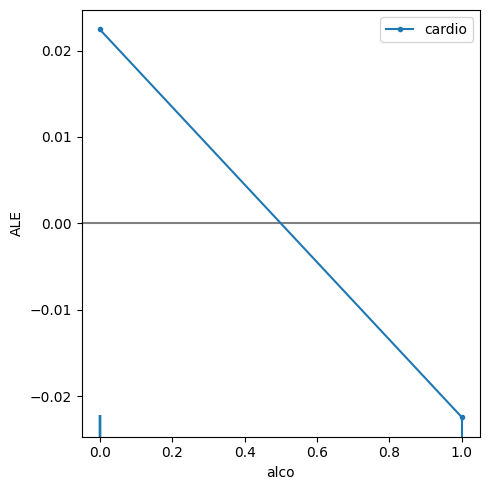

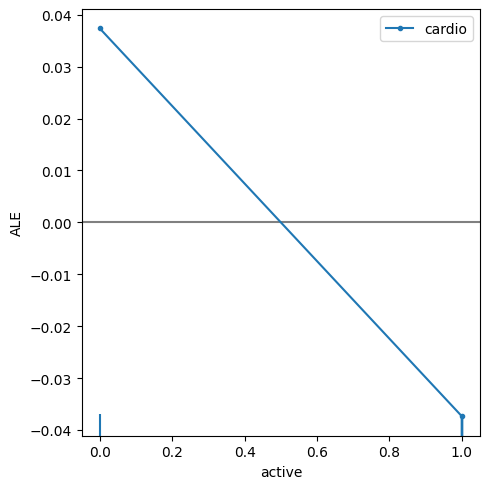

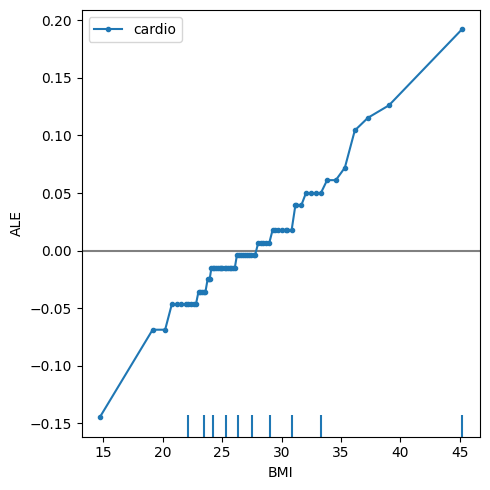

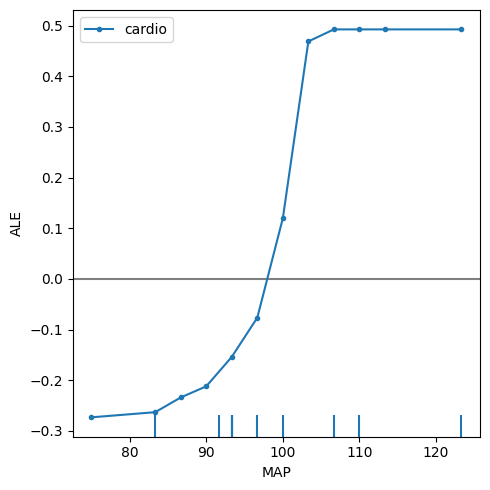

In [ ]:
for i in range(0, 9):
    plot_ale(exp, features=[i], fig_kw={'figwidth':5, 'figheight': 5})

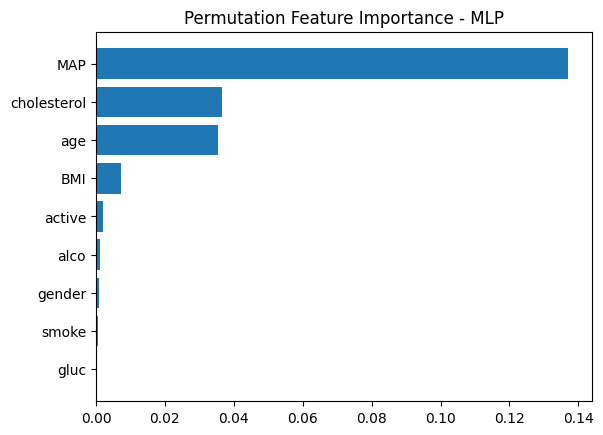

In [ ]:
result = permutation_importance(best_estimator, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance - MLP")
plt.show()

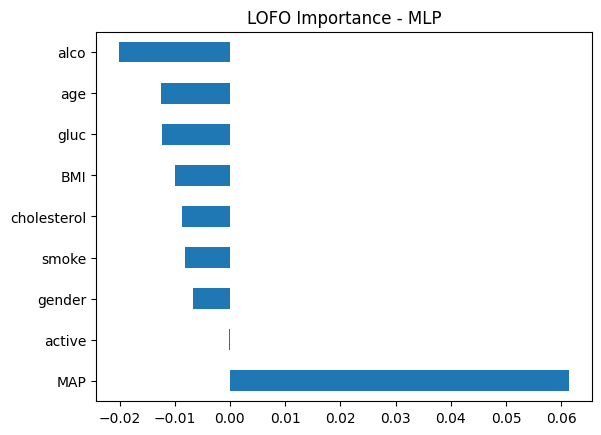

In [ ]:
baseline = cross_val_score(best_estimator, X_train, y_train, cv=5).mean()

lofo_scores = {}
for col in X_test.columns:
    X_lofo = X_train.drop(columns=[col])
    score = cross_val_score(best_estimator, X_lofo, y_train, cv=5).mean()
    lofo_scores[col] = baseline - score

lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
lofo_df.plot(kind='barh')
plt.title("LOFO Importance - MLP")
plt.show()

In [ ]:
X_exp = np.random.choice(range(len(X_test)), 100)
X_exp = X_test.iloc[X_exp.tolist(), :]

In [ ]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(best_estimator, X_exp)

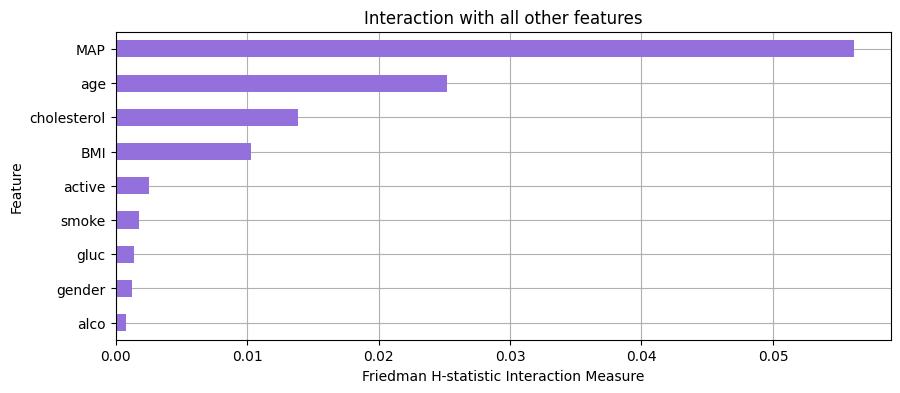

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

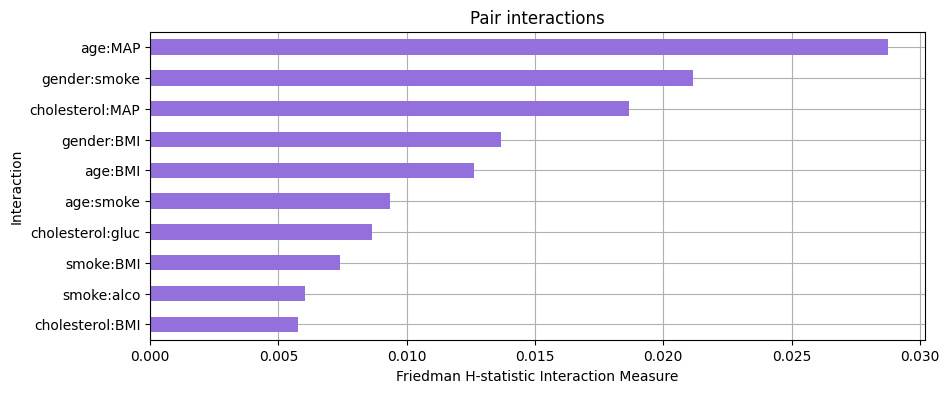

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart',ax=ax)

In [ ]:
background = shap.sample(X_train, 500)
explainer = shap.KernelExplainer(best_estimator.predict_proba, background)

X_to_explain = shap.sample(X_test, 500)
shap_values = explainer.shap_values(X_to_explain)

  0%|          | 0/500 [00:00<?, ?it/s]

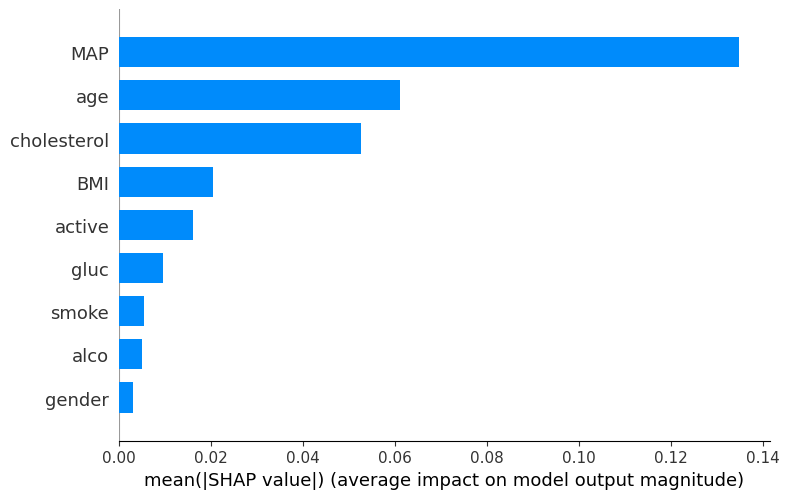

In [ ]:
figure = plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_to_explain, plot_type='bar')

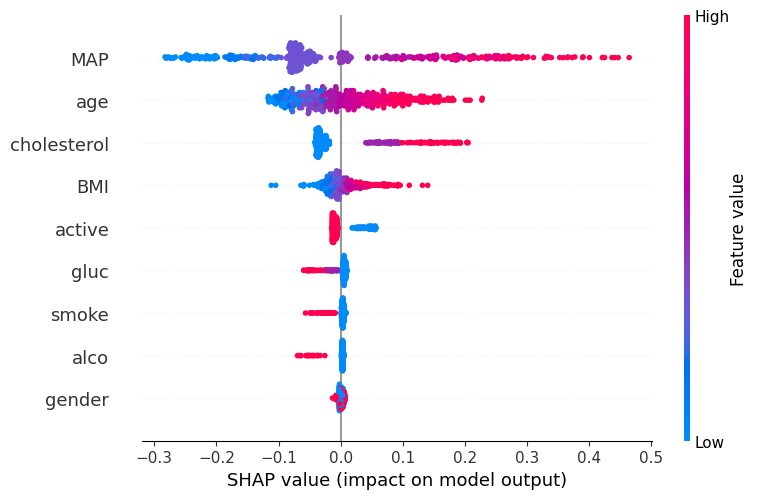

In [ ]:
shap.summary_plot(shap_values[:, :, 1], X_to_explain)